<a href="https://colab.research.google.com/github/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/CAS-D1-Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 2, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2024-08-27, A. Mühlemann, University of Bern.

*This notebook is based on the notebook by S. Haug and G. Conti from 2020*


# 2. Probability and descriptive statistics


**Average expected study time :** 3x45 min (depending on your background). Your are supposed to play with the examples: change them, maybe test on another dataset. From just executing them, you will not learn much.

**Learning outcomes :**
- Random variables and probability density functions
  - Know the normal probability density function (pdf)
  - Know some other useful probability distributions
- Describing data with descriptive statistics
  - Obtain moments of a distribution. (mean, variance, standard deviation, kurtosis, skewness, quantile, median, mode)
  - Generate data randomly according to a given distribution

In [1]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## 2.1 Random variables and probability density functions (pdf)



As already mentioned this morning: probability theory is fundamental to statistics because it provides the mathematical framework for dealing with uncertainty and randomness, which are inherent in real-world data and phenomena.

In inteferential statistics, we understand an experiment as a random process - similar to a coin toss - in which the outcome is unknown before it is conducted. With the help of probability theory, the possible outcomes can be described.

Illustrated on our iris data set: we did not know which lenghts and widths we would obsereve, before we actually collected aour data. Thus, the data set at hand is the product of a random process. More precisely, for each flower the observed values are the outcome of a random process.

Thus, the observables are often called **random variables** and denoted by $X$. All in all, we can view our dataset as a number of manifestations of random variables $X_1$, $X_2$,...., $X_n$.

A random variable $X$ can be discrete or continuous. And they can be uniquely described by their distribution. One option to discribe their distribution, is to work with probablility mass functions (in the case of discrete $X$) and probability density functions (in the case of continuous $X$).

If $X$ is discrete, then we use $f(x;\theta)=P_\theta(X=x)$ to denote the probability that random variable $X$ takes value $x$ (in python the term probability mass function, pmf, is used for $f(x;\theta)$). The parameter $\theta$ stands for the parameters that influence the shape of the probability mass function.

If $X$ is a continuous random variable, then $X$ can be uniquely described by its probability density funtion (pdf) $f(x;\theta)$ that may also depend on one or more parameters $\theta$. In contrast to the case where $X$ is discrete, the values of $f(x;\theta)$ cannot be directly interpreted as the probabilities of outcome $x$. Instead, we look at an interval $[a,b], a\le b, $ and interpret the area that the density assumes in this interval as the probability that X takes a value between $a$ and $b$ i.e.

$$
\int_a^b f(y,\theta) \, dy = P(X \in [a,b]).
$$


The pdf is always normalized to **unity** (the number 1), i.e.
$$
\int_{-\infty}^\infty f(y,\theta) \, dy = 1.
$$
This makes sense, as this means nothing else as that the probability that any of the possible outcomes materializes equals 1.

Sometimes $\theta$ is unknown. Then, we wish to estimate its value from a given set of measurements of $X_1, ..., X_n$. This is a central topic of statistics (see next notebook on parameter estimation and regression).

The following sections introduce some of the most used distributions - first and foremost the normal distribution.

### 2.1.1 The normal distribution

The normal (or Gaussian) distribution is probably the most used one. It
derives its importance in large part from the *central limit theorem*. Roughly speaking the central limit theorem says "In most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed." https://en.wikipedia.org/wiki/Central_limit_theorem

**Example:** If one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. (In the limit of an infinite number of flips, it will equal a normal curve.)

This means that in many cases it is sufficient to know the characteristics of the normal pdf. Also often unspecified statements like the *error*, or better, the *uncertainty* refer to their meaning on the normal pdf.

The density of the normal distribution (in one dimension) is given by

$$ f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{-(x-\mu)^2}{2\sigma^2}) $$

It reads, given the distribution parameters mean $\mu$ and variance $\sigma$, x follows this function.

### Exercise 2.1 (5 min)

Plot the normal distribution with mean 0 and variance 5 for 400 x values between -20 to 20. Repeat this for two other means and variances. How big is the surface under the curves ?

(See also scipy.stat.norm https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)  


[(1.0000000000000004, 1.497655446788251e-10),
 (1.0000000000000002, 2.0856494907220597e-13),
 (1.0000000000000002, 8.67103044327835e-10)]

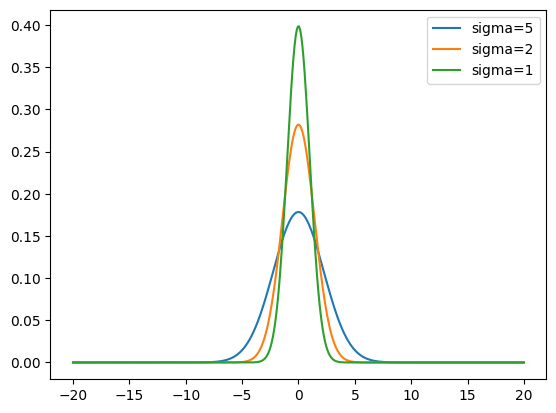

In [ ]:
# Part of the solution:
x = np.linspace(-20,20,400) # 400 bins from -20 to 20
plt.plot(x, scipy.stats.norm.pdf(x,0,5**0.5))
plt.plot(x, scipy.stats.norm.pdf(x,0,2**0.5))
plt.plot(x, scipy.stats.norm.pdf(x,0,1**0.5))

plt.legend(['sigma=5', 'sigma=2', 'sigma=1'])

# The quad function takes the function to integrate and the lower and upper bounds as arguments.
a1 = scipy.integrate.quad(scipy.stats.norm.pdf, -20, 20, args=(0, 5**0.5))
a2 = scipy.integrate.quad(scipy.stats.norm.pdf, -20, 20, args=(0, 2**0.5))
a3 = scipy.integrate.quad(scipy.stats.norm.pdf, -20, 20, args=(0, 1**0.5))

[a1, a2, a3]


### 2.1.2 Poisson distribution

**Some words on the Poisson distribution**

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. For example:

- The number of meteorites greater than 1 meter diameter that strike earth in a year
- The number of patients arriving in an emergency room between 10 and 11 pm

The probability mass function is $$f(k;\lambda) = \frac{\lambda^k exp(-\lambda)}{k!}$$
For large $k$ the normal distribution is an excellent approximation of the poisson pdf. For $k$ below 20 one should be careful using statements based on the normal distribution, e.g. the distribution is not symmetric anymore.

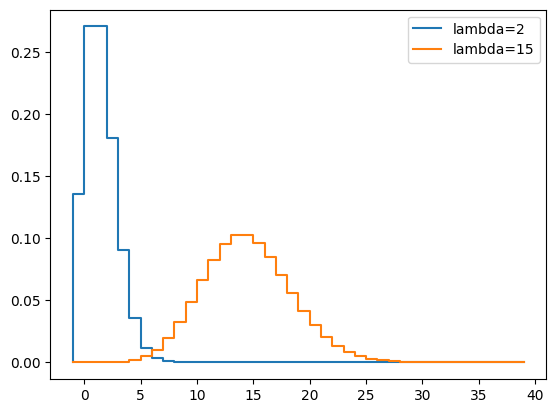

In [ ]:
x = np.arange(-1, 40)
plt.step(x,scipy.stats.poisson.pmf(x,2))
plt.step(x,scipy.stats.poisson.pmf(x,15))
plt.legend(['lambda=2', 'lambda=15'])

We see that a possion pdf with mean 15 looks very much like the normal distribution.

#### Exercise (after reading the section on descriptive statistics)
Get some desciptive statistics from the poisson pmf with mean 1.7. See also https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [ ]:
mean, variance, skewness, kurtosis = scipy.stats.poisson.stats(1.7,moments='mvsk')
#my_norm = norm(0,2)
print('Mean = %1.2f Var = %1.2f Std = %1.2f Skewness = %1.2f kurtosis = %1.2f' % (mean,variance,variance**0.5,skewness,kurtosis))
#my_norm.moments()

Mean = 1.70 Var = 1.70 Std = 1.30 Skewness = 0.77 kurtosis = 0.59


Plot mode and median of the above poisson distribution.

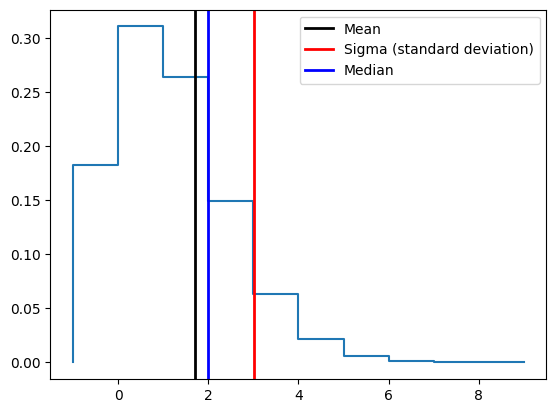

In [ ]:
dist = scipy.stats.poisson(1.7)
x = np.arange(-1, 10)
sigma=variance**0.5
plt.step(x,dist.pmf(x))
dist.median()
plt.axvline(x=mean, linewidth=2, color = 'k',label="Mean")
plt.axvline(x=mean+sigma, linewidth=2, color = 'r', label="Sigma (standard deviation)")
plt.axvline(x=dist.median(), linewidth=2, color = 'b',label="Median")
plt.legend(loc='upper right')

### 2.1.3 Binomial distribution

The binomial distribution is frequently used to model the number of successes $k$ in a sequence of $n$ independent experiments.

$$f(k;n,p) = \binom{n}{k} \cdot p^kq^{n-k}$$

The binomial distribution converges towards the Poisson distribution as the number of trials $n$ goes to infinity while the product $np_n$ remains fixed. In this case, the Poisson distribution with parameter $\lambda = np$ can be used as an approximation of the binomial distribution with parameters $n$ and $p$.

For $n>20$ and $p$ not too close to $1$ or $0$, the normal distribution is also here a good approximation.

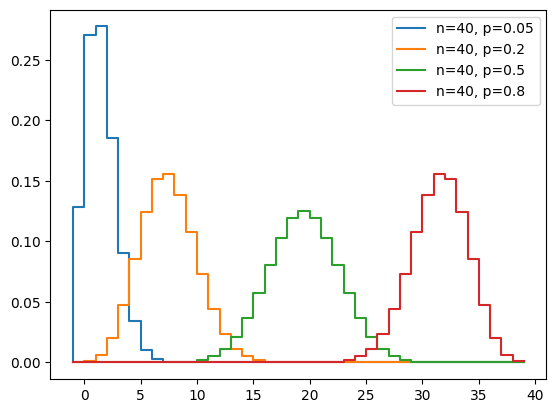

In [ ]:
x = np.arange(-1, 40)
plt.step(x,scipy.stats.binom.pmf(x,40,0.05))
plt.step(x,scipy.stats.binom.pmf(x,40,0.2))
plt.step(x,scipy.stats.binom.pmf(x,40,0.5))
plt.step(x,scipy.stats.binom.pmf(x,40,0.8))
plt.legend(['n=40, p=0.05', 'n=40, p=0.2', 'n=40, p=0.5', 'n=40, p=0.8'])

### 2.1.4 Student-distribution or t-distribution


The $t$-distribution is symmetric and bell-shaped, like the normal distribution. However, the $t$-distribution has heavier tails than the normal distribution. This means that it is more prone to producing values that fall far from its mean. This makes it useful for understanding the statistical behavior of certain types of ratios of random quantities, in which variation in the denominator is amplified and may produce outlying values when the denominator of the ratio falls close to zero.


We will indirectly encounter the $t$-distribution on day four, when we look at hypothesis testing.

In [ ]:
from scipy.stats import t
df=8
mean, var, skew, kurt = t.stats(df, moments='mvsk')
print('Mean = %1.2f Var = %1.2f Std = %1.2f Skewness = %1.2f kurtosis = %1.2f' % (mean,var,var**0.5,skew,kurt))

Mean = 0.00 Var = 1.33 Std = 1.15 Skewness = 0.00 kurtosis = 1.50


Plot the pdf for 2 and 10 degrees of freedom

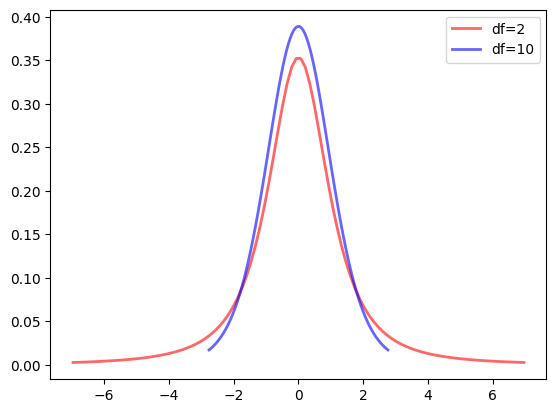

In [ ]:
fig, ax = plt.subplots(1, 1)
df=2
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
        'r-', lw=2, alpha=0.6, label='t pdf')

df=10
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
        'b-', lw=2, alpha=0.6, label='t pdf')
ax.legend(['df=2','df=10'])

### 2.1.5 Gamma distribution



In probability theory and statistics, the gamma distribution is a two-parameter family of continuous probability distributions.

The depending on the parameters the Gamma distribution can be skewed to that it can be helpful to model the size of insurance claims and rainfalls.

Lets look at the gamma pdf for different parameters

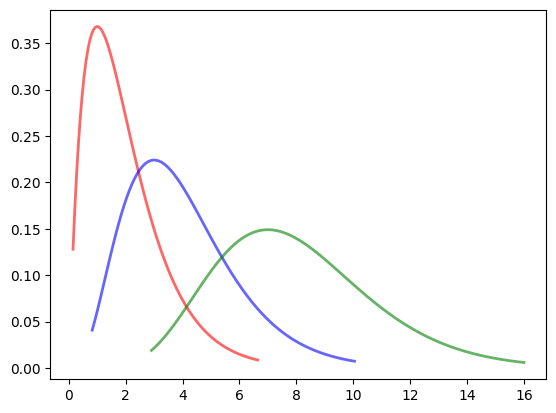

In [ ]:
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)
a = 2
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)

ax.plot(x, gamma.pdf(x, a),
       'r-', lw=2, alpha=0.6, label='gamma pdf')

a = 4
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)

ax.plot(x, gamma.pdf(x, a),
       'b-', lw=2, alpha=0.6, label='gamma pdf')
a = 8
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)

ax.plot(x, gamma.pdf(x, a),
       'g-', lw=2, alpha=0.6, label='gamma pdf')

Of course there are many many more useful distribution. If you want to see more, check out this reference http://staff.fysik.su.se/~walck/suf9601.pdf

## 2.2 Describing distributions


### 2.3.1 Moments of the pdf


An important operator often used in probability theory and statistics is the expectation of a random variable $X$ with pdf $f(x;\theta)$ given by
$$\mu=\mathbb{E}(X) = \int_{-\infty}^{\infty} xf(x; \theta)dx.   $$
The expected value is basically a generalized weighted average. In the case where $X$ is discrete the expectation is given by
In the discrete case this integral becomes the sum known as the arithemtic mean:
$$ \mu = \mathbb{E}(X)=  \sum_{i=1}^n \mathbb{P}(X=x_i) x_i.$$
If $X$ is uniform this reduces to
$$ \mu=\mathbb{E}(X) = \frac{1}{n}\sum_{i=1}^n  x_i.$$

Since in statistics we assume that our draws are uniform this is the formula we use to estimate the expectation.
<!--
and the $n^{th}$ central moment of x (or moment about the mean, $α_1$) is

$$ m_n \equiv E[(x-\alpha_1)^n] = \int_{-\infty}^{\infty} (x-\alpha_1)^nf(x)dx   $$
-->

Another operator closely related to the **mean $\mu$ (or expectated value)** is the **variance $\sigma^2$**, that is the expectation of the squared deviation of a random variable from its mean:

$$\sigma^2= Var(X) =\int_{-\infty}^{\infty} (x-\mu)^2 f(x)dx$$

If $X$ is discrete then
$$ \sigma^2 = Var(X)=\sum_{i=1}^n (x_i - \mu)^2P(X=x_i).$$

If $X$ is uniform this reduces to
$$ \sigma^2 = Var(X)= \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2.$$

The mean is the location of the “center of mass” of the pdf, and the variance is a measure of the square of its width. It is often convenient to use the **standard deviation (SD)** of $X$, $\sigma$, defined as the square root of the variance.

The mean and variance are especially important when talking about normal distribution as they uniquely characterize the graph of the normal distribution:  the mean is center of the graph and the standard deviation  determines the amount of dispersion away from the mean.

The idea behind the mean can be generalized, so that we obtain a the notion of moments
$$\mathbb{E}(x^n) = \int_{-\infty}^{\infty} x^nf(x)dx.   $$

The second moment $\mathbb{E}(X^2)$ occurs in the variance, the third $\mathbb{E}(X^3)$ is related to the skewness and fourth moment $\mathbb{E}(X^4)$ to the kurtosis.  The skewness is a number indicating the deviation from a symmetric form. Kurtosis is a number indicating if the tails of the distribution is larger or smaller then the tails of the normal distribution.


### 2.3.2 Quantiles and median

The **quantile $q_{\alpha}$** is the value $x$ of the random variable $X$ at which $\alpha\%$ of the area is smaller than $x$. An important special case is the **median, $q_{med} \equiv q_{0.5}$**. At the median half the area lies above and half lies below.
For the normal pdf the median equals the mean. The most probable value of a distribution is called **mode**.

Special quantiles are the quartiles and percentiles. The first quartile is the $q_{0.25}$, the second the $q_{0.5}$ etc. Percentiles are for example $q_{0.75}$ etc.

<!--
Any odd moment about the mean is a measure of the **skewness** of the p.d.f. The simplest of these is the dimensionless coefficient of skewness $\gamma_1 = m_33/\sigma^3$.

The fourth central moment $m_4$ provides a convenient measure of the tails of a distribution. For the Gaussian distribution, one has $m_4 = 3\sigma^4$. The **kurtosis** is defined as $\gamma_2 = m_4/\sigma^4 − 3$, i.e., it is zero for a Gaussian, positive for a leptokurtic distribution with longer tails, and negative for a platykurtic distribution with tails that die off more quickly than those of a Gaussian.

The **quantile $x_{\alpha}$** is the value of the random variable x at which the cumulative distribution is equal to $\alpha$. That is, the quantile is the inverse of the cumulative distribution function, i.e., $x_{alpha} = F^{−1}(\alpha)$. An important special case is the **median, $x_{med}$**, defined by $F(x_{med}) = 1/2$, i.e., half the probability lies above and half lies below $x_{med}$. (More rigorously, $x_{med}$ is a median if $P(x \geq x_{med}) \geq 1/2$ and $P(x \leq x_{med}) \geq 1/2$. If only one value exists, it is called ‘the median.’)

Under a monotonic change of variable $x \rightarrow y(x)$, the quantiles of a distribution (and hence also the median) obey $y_{\alpha} = y(x_{\alpha})$. In general the expectation value and **mode** (most probable value) of a distribution do not, however, transform in this way.

Let us look at median and quantile$_68$ of the normal pdf:
-->

#### Exercise

Get some desciptive statistics from a normal (continous) pdf with mean 0 and standard deviation 4.

In [5]:
mean, variance, skewness, kurtosis = scipy.stats.norm.stats(0,4,moments='mvsk')
print(mean, variance, skewness, kurtosis)

0.0 16.0 0.0 0.0


Plot the pdf and some moments

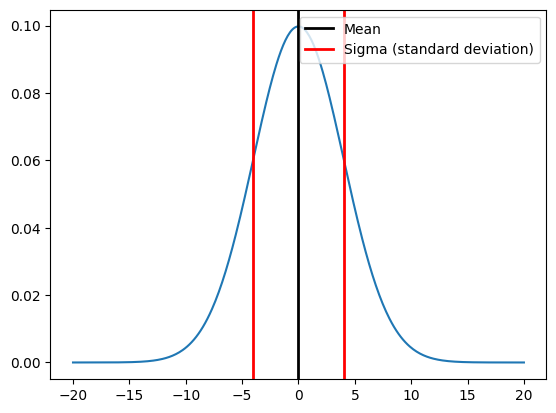

In [ ]:
x = np.linspace(-20,20,400)
sigma=variance**0.5
plt.plot(x,scipy.stats.norm.pdf(x,mean,sigma))
plt.axvline(x=mean, linewidth=2, color = 'k',label="Mean") # Plot the mean as a vertical line
plt.axvline(x=mean-sigma, linewidth=2, color = 'r', label="Sigma (standard deviation)")
plt.axvline(x=mean+sigma, linewidth=2, color = 'r')
plt.legend(loc='upper right')

Produce the descriptive statistics for the Iris Virginica data.
Then plot the histograms and scatter plots.
We have seen that Iris Virginica could possibly be normal distributied. Thus, median and mean should be close. Let us check this

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataframe = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])
dataframe.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_virginica = dataframe[dataframe['species']=='Iris-virginica']
df_virginica.drop(columns=['species']).mean()

,0
slength,6.588
swidth,2.974
plength,5.552
pwidth,2.026


In [ ]:
df_virginica.drop(columns=['species']).median()

,0
slength,6.50
swidth,3.00
plength,5.55
pwidth,2.00


In [ ]:
df_virginica.drop(columns=['species']).describe() # Or get a summary

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


All the descriptive statistics methods for python dataframes are listed here:
https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

Now we looked at the numbers. Let's us plot the distributions.

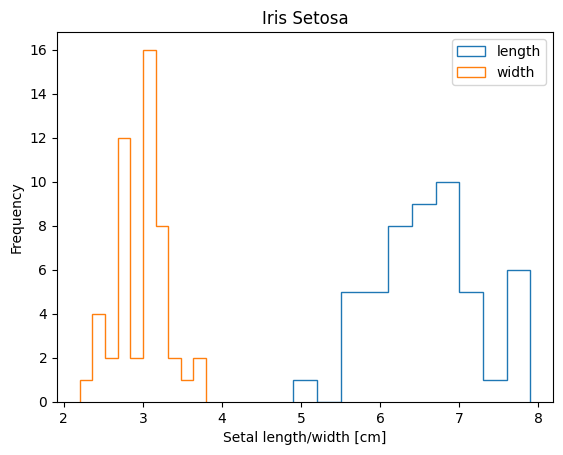

In [ ]:
df_virginica['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa', label="length")
ax = df_virginica['swidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax.set_xlabel('Setal length/width [cm]')
ax.set_ylabel('Frequency')
plt.legend()

## 2.4 How to generate random variables based on a normal distribution

One can simulate data sets by generating them from probability density functions. The computer does this with a so called Monte Carlo (MC) algorithm. It draws $x$ values (pseudo) randomly from the given distribution. The the actual draws of the random variable are called random variates. Simulations can be very useful when planning an experiment and developing the analysis method. Instead of real data one can use the simulated data.

Let us simulate the iris virginica sepal width data (width the mean and standard deviation we got from the real data) given that a normal distribution is a reasonable model for the swith of iris virginica.

In [3]:
n = scipy.stats.norm.rvs(2.974000,0.322497,50) # 100 (sawi: 50!) random values from a normal distribution with mean 2.974000 and SD 0.322497
len(n)

50

In [ ]:
print(n[0:10]) # Print first 10 (sawi: 11!)

[2.62223668 2.88652814 3.49851185 2.94734114 2.80903232 2.45982015
 2.51155894 3.34031139 2.9603435  2.40324458]


In [7]:
# Put the simulated data into a dataframe
df_virginica_sim = pd.DataFrame(n)
df_virginica_sim.head()

,0
0,3.360473
1,2.903074
2,2.952204
3,2.892068
4,2.967118


####Exercise
Try to generate a random t-distributed sample of size 20 with df=10.

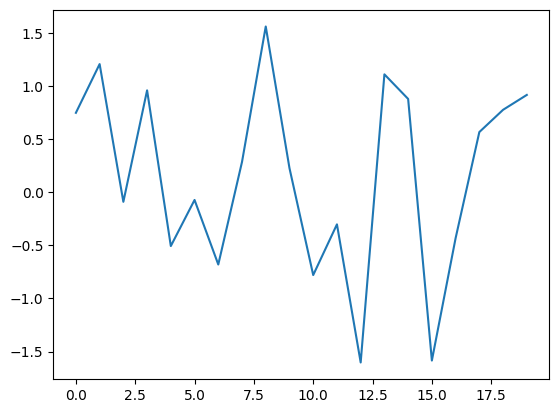

In [ ]:
## write your code here
sample_t = scipy.stats.t.rvs(10,size=20)

# plot sample_t
plt.plot(sample_t)
plt.show()

## 2.5 Uncertainties


All data have uncertainties. These should always be communicated when showing scientific numbers or plots. We distinguish between two types.

- Statistical uncertainties
    - Fluctuations, can be made smaller by taking more data, i.e. get more statistics
- Systematic uncertainties
    - Shift of data in one direction due to some "mistake" in the measurement, e.g. wrongly calibrated instrument showing all measured values systematically higher as they really are. Or for instance uncertainty due to the choice of methods and tools
    
The statistics tools can mostly handle the statistical uncertainties. There is no mathematical recipe for dealing with systematical uncertainties. You have to think through your experiment and try to estimate the influence of everything that can go wrong.

When uncertainties are stated on numbers or in graphs as error bars or error bands they generally show one standard deviation. If the data are well described by a normal distribution, the interpretation of one standard deviation is clear: if the measurement is repeated many times, 32% (or about 1/3 of the measurements) **should** be outside the error bars.

If the distribution is not normal, the interpretation of one standard deviation is not as clear. For example, a poisson distribution is not necessary symmetric. So again we see, for low counts where the normal asumption is not a good approximation, let's say below 20, the interpretation is not obvious anymore and care is needed.


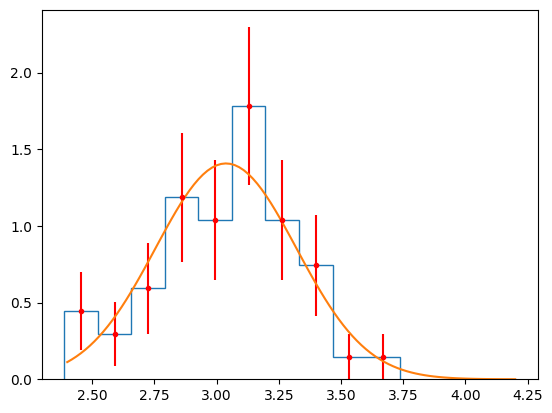

In [8]:
# Draw a histogram which is not normalised
entries1, edges, patches = plt.hist(n, bins=10, histtype='step')
# Close plt so that this histogram is not shown
plt.close()
# Draw a histogram which IS normed
entries2, edges, patches = plt.hist(n, bins=10, histtype='step',density=True)
# Calculate the poisson standard deviation and scale down to second histogram
errors = np.sqrt(entries1) * entries2/entries1
# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])
# draw errobars, use the sqrt error.
plt.errorbar(bin_centers, entries2, yerr=errors, fmt='r.')
# Draw a normal distribution
x = np.linspace(2.4,4.2,100)
sigma=variance**0.5
plt.plot(x,scipy.stats.norm.pdf(x,df_virginica_sim.mean(),df_virginica_sim.std()))
plt.show()

We see that 3 out of 10 data points are more than one standard deviation off the "theory" curve. This is how it should be.

## 2.6 Questions?

Do you have a question for tomorrow's discussion session: https://forms.gle/QUL62MbmQiEEYvY37

## References

1. H. Cramer, Mathematical Methods of Statistics, (Princeton Univ. Press, New Jersey, 1958).
2. A. Stuart and J.K. Ord, Kendall’s Advanced Theory of Statistics, Vol. 1 Distribution Theory 6th Ed., (Halsted Press, New York, 1994), and earlier editions by Kendall and Stuart.
3. R.J. Barlow, Statistics: A Guide to the Use of Statistical Methods in the Physical Sciences, (John Wiley, New York, 1989).
4. S. Brandt, Data Analysis, 3rd Ed., (Springer, New York, 1999).
5. G. Cowan, Statistical Data Analysis, (Oxford University Press, Oxford, 1998).
6. A.N. Kolmogorov, Grundbegriffe der Wahrscheinlichkeitsrechnung, (Springer, Berlin,
1933); Foundations of the Theory of Probability, 2nd Ed., (Chelsea, New York 1956).
7. Ch. Walck, Hand-book on Statistical Distributions for Experimentalists, University of Stockholm Internal Report SUF-PFY/96-01, available from http://staff.fysik.su.se/~walck/suf9601.pdf.
8. M. Abramowitz and I. Stegun, eds., Handbook of Mathematical Functions, (Dover, New York, 1972).

# Annex Probability

An abstract definition of probability can be given by considering a set $\Omega$, called the sample space, and possible subsets $A,B,...$ the interpretation of which is left open. The probability $P$ is a real-valued function defined by the following axioms due to Kolmogorov (1933) [9]:

- For every subset $A$ in $S$, $P(A) ≥ 0$;
- For disjoint subsets (i.e., $A ∩ B = ∅$), $P(A ∪ B) = P(A) + P(B)$;
- $P(S)=1$.

From this further properties can be derives, e.g.

- $P(\bar{A}) = 1 - P(A)$
- $P(A \cup \bar{A}) = 1$
- $P(\emptyset) = 0$
- if A in B, then $P(A)\leq P(B)$
- $P(A \cup \bar{A}) = P(A) + P(B) - P(A\cap B)$

#### Conditional probability
In addition, one defines the conditional probability $P(A|B)$ (read as $P$ of $A$ given $B$) as $$P(A|B) = \frac{P(A ∩ B)}{P(B)}$$

As an example, when throwing the dice, consider obtaining more than 3 eyes given only trows with even number of eyes outcomes. We calculate the (conditional) probability:

$$P(n>3|n\; even) = \frac{P(n>3 \cap n\; even)}{P(even)} = \frac{2/6}{3/6} = \frac{2}{3}$$

#### Independence

If A and B are independent, then

$$P(A|B) = \frac{P(A ∩ B)}{P(B)} = \frac{P(A)P(B)}{P(B)} = P(A)$$
